<a href="https://colab.research.google.com/github/divya87681/word-embedding/blob/main/word_embeddingg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn

In [3]:
!pip install --no-cache-dir --upgrade scikit-learn

In [4]:
!pip install nltk gensim matplotlib seaborn

In [5]:
!pip install scikit-learn

In [17]:
import nltk
nltk.download('punkt')  # Correct resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
corpus

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [15]:
print(model.wv.index_to_key[:50])  # Show first 50 words in vocabulary

['one', 'would', 'said', 'new', 'could', 'time', 'two', 'may', 'first', 'like', 'man', 'even', 'made', 'also', 'many', 'must', 'af', 'back', 'years', 'much', 'way', 'well', 'people', 'little', 'state', 'good', 'make', 'world', 'still', 'see', 'men', 'work', 'long', 'get', 'life', 'never', 'day', 'another', 'know', 'last', 'us', 'might', 'great', 'old', 'year', 'come', 'since', 'go', 'came', 'right']


In [20]:
import nltk
import gensim
import string
from nltk.corpus import brown
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary datasets
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
corpus = brown.sents()

# Preprocess text
def preprocess_text(sentences):
    stop_words = set(stopwords.words('english'))
    cleaned_sentences = []
    for sent in sentences:
        tokens = [word.lower() for word in sent if word.isalpha()]  # Remove punctuations
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        cleaned_sentences.append(tokens)
    return cleaned_sentences

cleaned_corpus = preprocess_text(corpus)
print(cleaned_corpus[:5])  # Print first 5 sentences


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place'], ['jury', 'said', 'presentments', 'city', 'executive', 'committee', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election', 'conducted'], ['term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'irregularities', 'primary', 'ivan', 'allen'], ['relative', 'handful', 'reports', 'received', 'jury', 'said', 'considering', 'widespread', 'interest', 'election', 'number', 'voters', 'size', 'city'], ['jury', 'said', 'find', 'many', 'registration', 'election', 'laws', 'outmoded', 'inadequate', 'often', 'ambiguous']]


In [21]:
from gensim.models import Word2Vec

# Train Word2Vec Model
model = Word2Vec(sentences=cleaned_corpus, vector_size=100, window=5, min_count=2, workers=4)

# Save the model
model.save("word2vec.model")
print("Model training complete!")


Model training complete!


In [22]:
# Load trained model
model = Word2Vec.load("word2vec.model")

# Find similar words
print(model.wv.most_similar("government", topn=5))

# Cosine similarity between two words
print("Similarity between 'government' and 'law':", model.wv.similarity("government", "law"))

# Word analogy example: "king" - "man" + "woman" = ?
try:
    print(model.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1))
except KeyError:
    print("One of the words is missing in vocabulary")


[('america', 0.9904318451881409), ('federal', 0.9902948141098022), ('state', 0.9841848611831665), ('american', 0.9819541573524475), ('world', 0.9808632731437683)]
Similarity between 'government' and 'law': 0.96806604
[('program', 0.9926902055740356)]


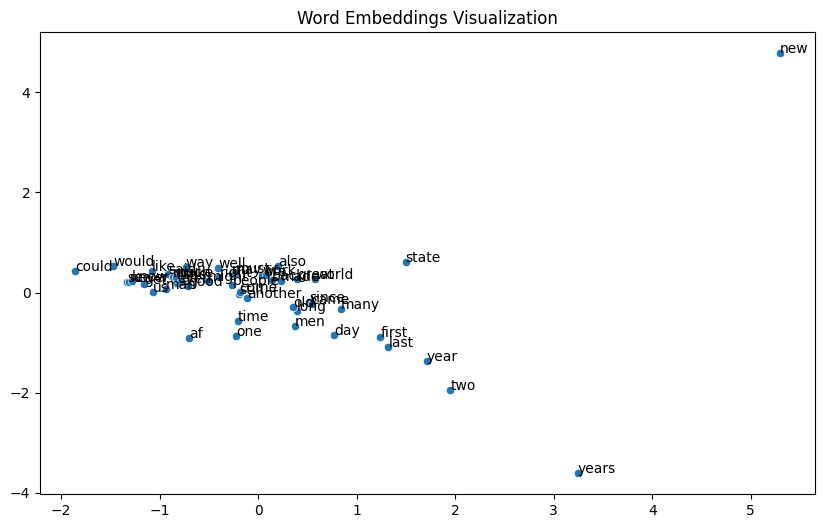

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Get Word Vectors
words = list(model.wv.index_to_key)[:50]  # First 50 words
vectors = model.wv[words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1])

# Annotate points
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("Word Embeddings Visualization")
plt.show()


In [23]:
from google.colab import drive
drive.mount('/content/drive')

# Save model to Google Drive
model_path = "/content/drive/My Drive/word2vec.model"
model.save(model_path)
print(f"Model saved to {model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/My Drive/word2vec.model


In [24]:
!pip install streamlit

In [12]:
import streamlit as st
from gensim.models import Word2Vec

# Load trained Word2Vec model
model = Word2Vec.load("word2vec.model")

st.title("🔎 Word Embeddings Explorer")

word = st.text_input("Enter a word to find similar words:")

if word:
    try:
        similar_words = model.wv.most_similar(word, topn=5)
        st.write("Top 5 similar words:")
        for w, score in similar_words:
            st.write(f"{w}: {score:.2f}")
    except KeyError:
        st.write("⚠️ Word not found in vocabulary. Try another one.")


2025-02-04 14:45:14.927 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:45:15.638 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-04 14:45:15.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:45:15.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:45:15.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:45:15.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:45:15.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 14:45:15.675 Session state does not 